### Sınıflar ve değerleri
head_sensor = 74
other = 109
punch = 224

### accuracy: 0.6707

### epochs = 6   n_splits = 4

### doğruluk matrisi
[[ 9  3  7]

 [ 0  8 12]
 
 [ 0  5 38]]

In [1]:
import tensorflow as tf

import numpy as np
import os
from tensorflow import keras
#import keras
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


2024-04-30 15:16:21.969451: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 15:16:21.970660: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 15:16:21.996144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 15:16:21.996892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_path = "/home/muhlabws4/Masaüstü/tkd_data/orj"

In [3]:
class_folders = os.listdir(data_path)

In [4]:
images = []
labels = []

In [5]:
for i , class_name in enumerate(class_folders):
    class_folder_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_folder_path)
    
    for img_name in class_images:
        img_path = os.path.join(class_folder_path, img_name)
        img = load_img(img_path, target_size=(128,128))
        img_array = img_to_array(img) /255.0
        images.append(img_array)
        labels.append(class_name)

In [6]:
X = np.array(images)
y = np.array(labels)

In [7]:
y

array(['head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sensor',
       'head_sensor', 'head_sensor', 'head_sensor', 'head_sens

In [8]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

In [9]:
X_shuf, y_shuf = X, y_encoder

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(X_shuf, y_shuf, test_size=0.2, random_state=42)

In [11]:
print(X.shape)
print(y.shape)
print(y_encoder.shape)

(407, 128, 128, 3)
(407,)
(407,)


In [12]:
#class_names = ['head_sb','head_sesor', 'other','punch','rotation']
class_names = ['head', 'other','punch']

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import sys
import os

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, GRU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import TimeDistributed,Bidirectional,GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

In [14]:
img_height=720
img_width=1280
output=3

In [15]:
def create_cnn_model():
    model = Sequential() 
   
    model.add(Conv2D(12, (3, 3), input_shape = (128,128,3) )) 
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))  
    model.add(MaxPooling2D(pool_size =(2, 2))) 
   
    #model.add(TimeDistributed(Flatten()))
    model.add(Flatten())
    model.add(Dense(units=100))

    model.add(Dropout(0.2)) 
    model.add(Dense(3)) 
    model.add(Activation('softmax')) 

    model.compile(loss ='sparse_categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
    return model

In [16]:
def pretrained_Xception():
    base_model = Xception(weights="imagenet", include_top=False, input_shape = (128,128,3))
    base_model.trainable = True ## Not trainable weights
    flatten_layer = Flatten()
    dense_layer_1 = Dense(256, activation='relu')
    #dense_layer_2 = Dense(20, activation='relu')
    prediction_layer = Dense(output, activation='softmax')
    
    model = Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      #dense_layer_2,
      prediction_layer
      ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy', #değiştirrr
        metrics=['accuracy'],
        )
    
    return model

In [29]:
modelX = pretrained_Xception()

In [23]:
modelCNN = create_cnn_model()

In [24]:
modelCNN.fit(train_images, train_labels, epochs=8)

Epoch 1/8
11/11 [==============================] - 0s 18ms/step - loss: 2.8492 - accuracy: 0.4831
Epoch 2/8
11/11 [==============================] - 0s 18ms/step - loss: 0.8658 - accuracy: 0.7385
Epoch 3/8
11/11 [==============================] - 0s 18ms/step - loss: 0.2419 - accuracy: 0.9169
Epoch 4/8
11/11 [==============================] - 0s 18ms/step - loss: 0.1029 - accuracy: 0.9815
Epoch 5/8
11/11 [==============================] - 0s 18ms/step - loss: 0.0583 - accuracy: 0.9908
Epoch 6/8
11/11 [==============================] - 0s 18ms/step - loss: 0.0499 - accuracy: 0.9938
Epoch 7/8
11/11 [==============================] - 0s 18ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 8/8
11/11 [==============================] - 0s 18ms/step - loss: 0.0190 - accuracy: 1.0000


In [37]:
modelX.fit(train_images, train_labels, epochs=20)

Epoch 1/50
11/11 [==============================] - 7s 592ms/step - loss: 1.0104 - accuracy: 0.5815
Epoch 2/50
11/11 [==============================] - 7s 590ms/step - loss: 0.7921 - accuracy: 0.6369
Epoch 3/50
11/11 [==============================] - 7s 595ms/step - loss: 0.7077 - accuracy: 0.6615
Epoch 4/50
11/11 [==============================] - 7s 587ms/step - loss: 0.5403 - accuracy: 0.7138
Epoch 5/50
11/11 [==============================] - 7s 590ms/step - loss: 0.4428 - accuracy: 0.8308
Epoch 6/50
11/11 [==============================] - 7s 592ms/step - loss: 0.5089 - accuracy: 0.8092
Epoch 7/50
11/11 [==============================] - 7s 592ms/step - loss: 0.4541 - accuracy: 0.8431
Epoch 8/50
11/11 [==============================] - 7s 596ms/step - loss: 0.3722 - accuracy: 0.8585
Epoch 9/50
11/11 [==============================] - 7s 598ms/step - loss: 0.4750 - accuracy: 0.8492
Epoch 10/50
11/11 [==============================] - 7s 597ms/step - loss: 0.2733 - accuracy: 0.8892

In [38]:
modelX.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 96ms/step - loss: 3.1920 - accuracy: 0.7561


[3.1920061111450195, 0.7560975551605225]

In [39]:
tahminlerX = modelX.predict(test_images)
y_pred_classesX = np.argmax(tahminlerX,axis=1)
test_labels
print(classification_report(test_labels, y_pred_classesX))

3/3 [==============================] - 1s 93ms/step
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.83      0.25      0.38        20
           2       0.71      0.98      0.82        43

    accuracy                           0.76        82
   macro avg       0.81      0.67      0.68        82
weighted avg       0.78      0.76      0.72        82



In [31]:
modelCNN.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 1.2080 - accuracy: 0.7317


[1.2080001831054688, 0.7317073345184326]

In [33]:
tahminler = modelCNN.predict(test_images)

3/3 [==============================] - 0s 5ms/step


In [34]:
y_pred_classes = np.argmax(tahminler,axis=1)
test_labels
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        19
           1       0.59      0.50      0.54        20
           2       0.75      0.98      0.85        43

    accuracy                           0.73        82
   macro avg       0.74      0.63      0.65        82
weighted avg       0.74      0.73      0.71        82



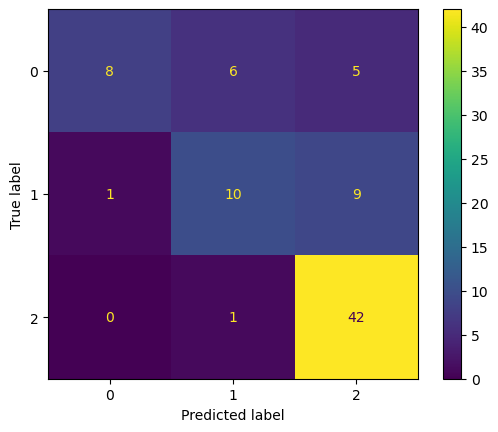

In [36]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.show() 

In [17]:
def cross_validation(model, X, y, n_splits=5, epochs=5, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #result = []
    for train_inx, val_inx in kfold.split(X):
        X_train, X_val = X[train_inx], X[val_inx]
        y_train, y_val = y[train_inx], y[val_inx]
        
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        a = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, class_weight={0:7,1:10,2:22})
        #model.fit(X_train, y_train, epochs=epochs)
        #result.append(a.history['val_accuracy'])
        
    #return result

In [18]:
def gosterTrain(index):
    plt.figure(figsize=(15,2))
    plt.imshow(train_images[index])
    plt.title(class_names[train_labels[index]])

In [19]:
def gosterTest(index):
    plt.figure(figsize=(15,2))
    plt.imshow(test_images[index])
    plt.title(class_names[test_labels[index]])

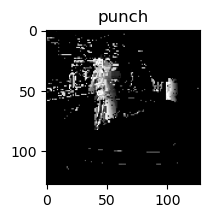

In [20]:
gosterTrain(10)

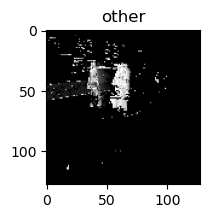

In [21]:
gosterTest(7)

In [18]:
model = models.Sequential([
    #cnn
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(3,activation='softmax')
])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_images, train_labels, epochs=10)

2024-04-30 11:30:44.545964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-30 11:30:44.548762: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
modelX = pretrained_Xception()
result = cross_validation(modelX, train_images, train_labels, n_splits=4, epochs=15, batch_size=32)

2024-04-30 15:18:42.211199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-30 15:18:42.220595: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/15
8/8 - 10s - loss: 18.9850 - accuracy: 0.5021 - 10s/epoch - 1s/step
Epoch 2/15
8/8 - 5s - loss: 17.3177 - accuracy: 0.5885 - 5s/epoch - 602ms/step
Epoch 3/15
8/8 - 5s - loss: 14.3486 - accuracy: 0.5885 - 5s/epoch - 602ms/step
Epoch 4/15
8/8 - 5s - loss: 8.8786 - accuracy: 0.5885 - 5s/epoch - 597ms/step
Epoch 5/15
8/8 - 5s - loss: 6.3899 - accuracy: 0.5885 - 5s/epoch - 593ms/step
Epoch 6/15
8/8 - 5s - loss: 5.4997 - accuracy: 0.5885 - 5s/epoch - 607ms/step
Epoch 7/15
8/8 - 5s - loss: 5.5025 - accuracy: 0.5885 - 5s/epoch - 611ms/step
Epoch 8/15
8/8 - 5s - loss: 5.0155 - accuracy: 0.5885 - 5s/epoch - 595ms/step
Epoch 9/15
8/8 - 5s - loss: 4.5868 - accuracy: 0.5967 - 5s/epoch - 603ms/step
Epoch 10/15
8/8 - 5s - loss: 4.0389 - accuracy: 0.6790 - 5s/epoch - 596ms/step
Epoch 11/15
8/8 - 5s - loss: 3.0924 - accuracy: 0.7901 - 5s/epoch - 602ms/step
Epoch 12/15
8/8 - 5s - loss: 3.0617 - accuracy: 0.8025 - 5s/epoch - 602ms/step
Epoch 13/15
8/8 - 5s - loss: 2.3952 - accuracy: 0.8107 - 5s

In [20]:
for i, resul in enumerate(result):
    print(f"Fold {i+1} Başarı Değeri:", resul[i])

TypeError: 'NoneType' object is not iterable

In [21]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
#model2.fit(train_images, train_labels, epochs=5)

In [23]:
#model.fit(train_images, train_labels, epochs=8)

In [24]:
modelX.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 95ms/step - loss: 56.9430 - accuracy: 0.7073


[56.942989349365234, 0.707317054271698]

In [28]:
tahminlerX = modelX.predict(test_images)

3/3 [==============================] - 0s 92ms/step


In [36]:
y_pred_classes = np.argmax(tahminlerX,axis=1)

In [37]:
tahminlerX[:7]

array([[9.4122380e-01, 4.2738818e-02, 1.6037481e-02],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [9.9951398e-01, 4.6191036e-04, 2.4034083e-05],
       [7.8520739e-01, 1.3723427e-01, 7.7558294e-02],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [31]:
np.argmax(tahminlerX[9])

2

In [32]:
test_labels

array([0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1])

In [33]:
y_pred_classes

array([0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [34]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       1.00      0.05      0.10        20
           2       0.65      1.00      0.79        43

    accuracy                           0.71        82
   macro avg       0.86      0.60      0.57        82
weighted avg       0.80      0.71      0.63        82



In [42]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

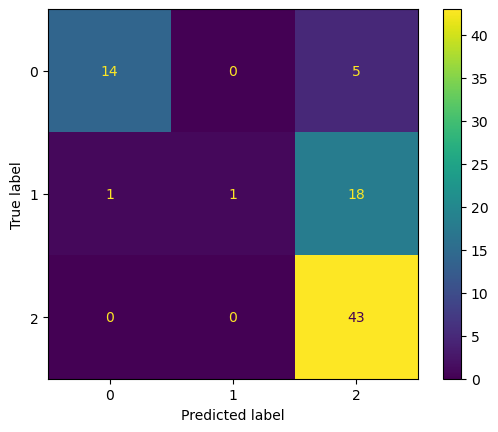

In [43]:
cm_display.plot()
plt.show() 

In [39]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

In [40]:
print(conf_matrix)

[[14  0  5]
 [ 1  1 18]
 [ 0  0 43]]


In [36]:
def tablo(confusion_matrix, index):
    TP=confusion_matrix[index][index]
    FN=sum(confusion_matrix[index][:index])+sum(confusion_matrix[index][index+1:])
    FP=sum(np.transpose(confusion_matrix)[index][:index])+sum(np.transpose(confusion_matrix)[index][index+1:])
    TN=sum(sum(confusion_matrix))-TP-FN-FP
    return TP,TN,FP,FN

In [37]:
def acc(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    acc = (TN+TP)/(TN+TP+FP+FN)
    return acc

In [38]:
def precision(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    p = (TP)/(TP+FP)
    return p

In [39]:
def sensitivity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sn = (TP)/(TP+FN)
    return sn

In [40]:
def specificity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sp = (TN)/(TN+FP)
    return sp

In [41]:
def f_score(confusion_matrix,index):
    p=precision(confusion_matrix,index)
    sn=sensitivity(confusion_matrix,index)
    f_score = ((p*sn)/(p+sn))*2
    return f_score

In [42]:
def recall(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    recall = TP/(TP+FN)
    return recall

In [43]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        19
           1       0.50      0.40      0.44        20
           2       0.67      0.88      0.76        43

    accuracy                           0.67        82
   macro avg       0.72      0.59      0.62        82
weighted avg       0.70      0.67      0.66        82



In [46]:
for i in range(4):
    print(f"\n{i} acc:", acc(conf_matrix,i))
    print(f"{i} precision:", precision(conf_matrix,i))
    print(f"{i} sensitivity:", sensitivity(conf_matrix,i))
    print(f"{i} specificity:", specificity(conf_matrix,i))
    print(f"{i} f_score:", precision(conf_matrix,i))
    print(f"{i} recall:", recall(conf_matrix,i))


0 acc: 0.8780487804878049
0 precision: 1.0
0 sensitivity: 0.47368421052631576
0 specificity: 1.0
0 f_score: 1.0
0 recall: 0.47368421052631576

1 acc: 0.7560975609756098
1 precision: 0.5
1 sensitivity: 0.4
1 specificity: 0.8709677419354839
1 f_score: 0.5
1 recall: 0.4

2 acc: 0.7073170731707317
2 precision: 0.6666666666666666
2 sensitivity: 0.8837209302325582
2 specificity: 0.5128205128205128
2 f_score: 0.6666666666666666
2 recall: 0.8837209302325582


IndexError: index 3 is out of bounds for axis 0 with size 3

In [47]:
f_score(conf_matrix,3)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [48]:
sensitivity(conf_matrix,3)

IndexError: index 3 is out of bounds for axis 0 with size 3

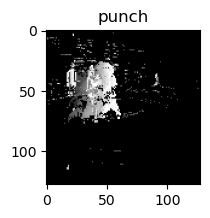

In [49]:
gosterTest(1)

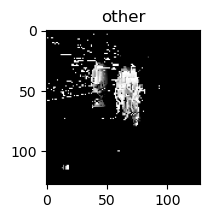

In [50]:
gosterTest(10)

In [51]:
tahmin_class = [np.argmax(i) for i in tahminler]
tahmin_class[10:20]

[2, 2, 2, 2, 2, 2, 2, 2, 0, 2]

In [52]:
test_labels[10:20]

array([1, 2, 2, 1, 2, 2, 2, 2, 0, 2])

In [53]:
print(classification_report(test_labels, tahmin_class,target_names=class_names))

              precision    recall  f1-score   support

        head       1.00      0.47      0.64        19
       other       0.50      0.40      0.44        20
       punch       0.67      0.88      0.76        43

    accuracy                           0.67        82
   macro avg       0.72      0.59      0.62        82
weighted avg       0.70      0.67      0.66        82



In [54]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128,3)),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10)
])

#model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [56]:
sonuc = cross_validation(model2, train_images, train_labels, n_splits=4, epochs=4, batch_size=32)

Epoch 1/4
8/8 - 0s - loss: 8.1017 - accuracy: 0.1193 - 470ms/epoch - 59ms/step
Epoch 2/4
8/8 - 0s - loss: 7.9880 - accuracy: 0.1317 - 251ms/epoch - 31ms/step
Epoch 3/4
8/8 - 0s - loss: 7.9501 - accuracy: 0.1440 - 251ms/epoch - 31ms/step
Epoch 4/4
8/8 - 0s - loss: 7.9602 - accuracy: 0.1523 - 251ms/epoch - 31ms/step
Epoch 1/4
8/8 - 0s - loss: 8.5026 - accuracy: 0.1352 - 465ms/epoch - 58ms/step
Epoch 2/4
8/8 - 0s - loss: 8.5026 - accuracy: 0.1393 - 249ms/epoch - 31ms/step
Epoch 3/4
8/8 - 0s - loss: 8.5026 - accuracy: 0.1434 - 252ms/epoch - 31ms/step
Epoch 4/4
8/8 - 0s - loss: 8.7666 - accuracy: 0.1639 - 252ms/epoch - 31ms/step
Epoch 1/4
8/8 - 0s - loss: 8.0213 - accuracy: 0.1721 - 469ms/epoch - 59ms/step
Epoch 2/4
8/8 - 0s - loss: 8.0213 - accuracy: 0.1721 - 251ms/epoch - 31ms/step
Epoch 3/4
8/8 - 0s - loss: 8.0213 - accuracy: 0.1721 - 251ms/epoch - 31ms/step
Epoch 4/4
8/8 - 0s - loss: 8.0213 - accuracy: 0.1721 - 250ms/epoch - 31ms/step
Epoch 1/4
8/8 - 0s - loss: 7.9836 - accuracy: 0.1352

In [57]:
for i, resul in enumerate(sonuc):
    print(f"Fold {i+1} Başarı Değeri:", resul[i])

TypeError: 'NoneType' object is not iterable

In [58]:
model2.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 2.5272 - accuracy: 0.1585


[2.5272276401519775, 0.15853658318519592]